Shivu K S

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set(style="whitegrid")


 Load the Datasets

In [7]:
matches_df = pd.read_csv('WorldCupMatches.csv')
players_df = pd.read_csv('WorldCupPlayers.csv')
cups_df = pd.read_csv('WorldCupMatches.csv')


Data Structure and Summary Statistics

In [8]:
# WorldCupMatches.csv
print(matches_df.info())
print(matches_df.describe(include='all'))

# WorldCupPlayers.csv
print(players_df.info())
print(players_df.describe(include='all'))

# WorldCups.csv
print(cups_df.info())
print(cups_df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

Check for Missing Values

In [9]:
print(matches_df.isnull().sum())
print(players_df.isnull().sum())
print(cups_df.isnull().sum())


Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64
RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64
Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goa

Year over Stage

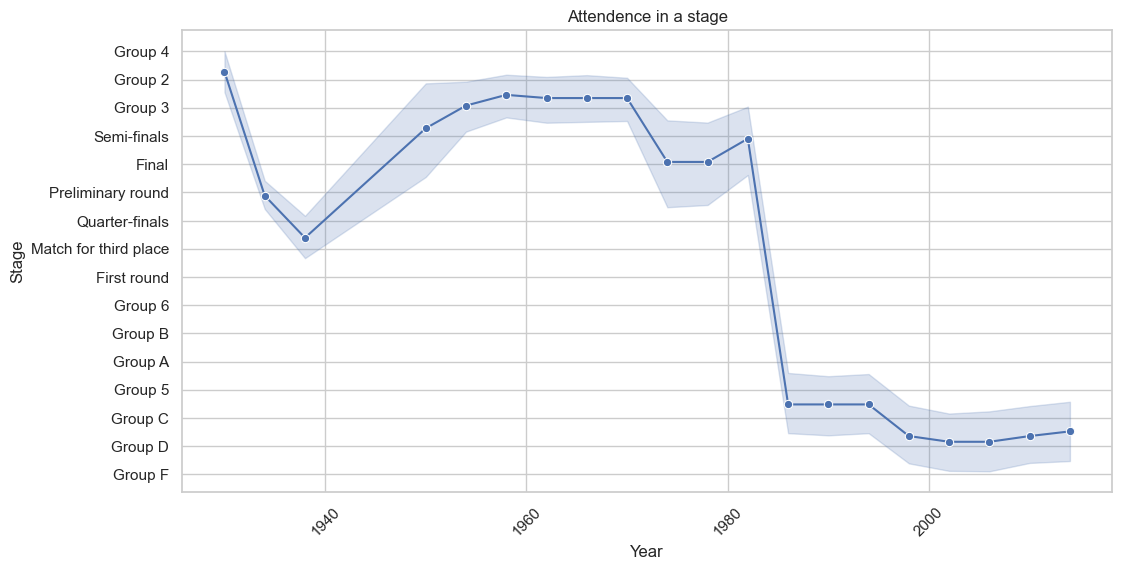

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=cups_df, x='Year', y='Stage', marker='o')
plt.title('Attendence')
plt.xlabel('Year')
plt.ylabel('Stage')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Attendance Over Time:

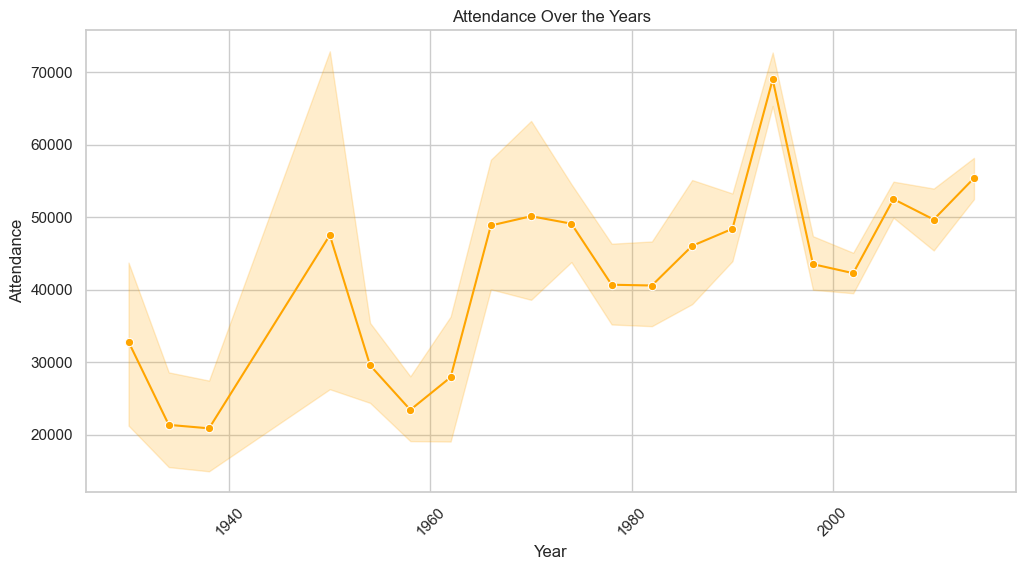

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=cups_df, x='Year', y='Attendance', marker='o', color='orange')
plt.title('Attendance Over the Years')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Distribution of Goals in Matches

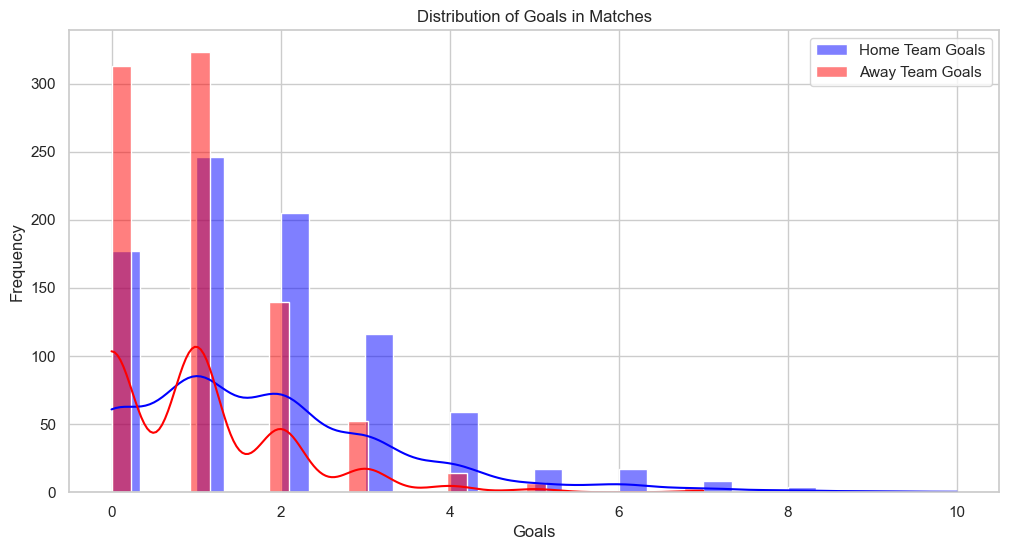

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(matches_df['Home Team Goals'], kde=True, label='Home Team Goals', color='blue', bins=30)
sns.histplot(matches_df['Away Team Goals'], kde=True, label='Away Team Goals', color='red', bins=30)
plt.legend()
plt.title('Distribution of Goals in Matches')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()


Top Scoring Teams

Brazil         225.0
Argentina      133.0
Germany FR     131.0
Italy          128.0
France         108.0
Germany        104.0
Spain           92.0
Netherlands     91.0
Hungary         87.0
Uruguay         80.0
dtype: float64


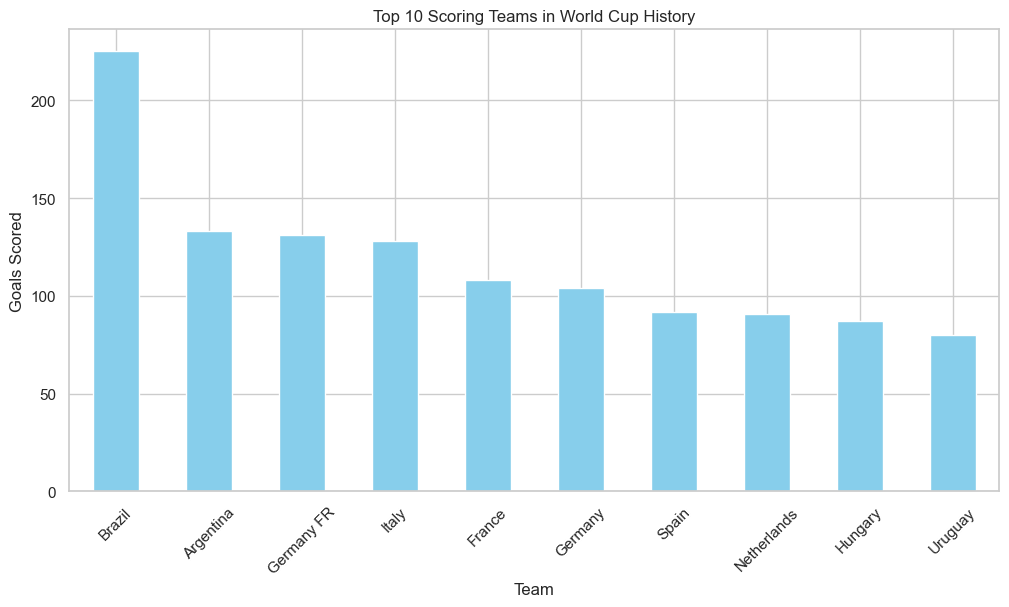

In [22]:
# Top scoring teams
home_goals = matches_df.groupby('Home Team Name')['Home Team Goals'].sum()
away_goals = matches_df.groupby('Away Team Name')['Away Team Goals'].sum()
total_goals = home_goals.add(away_goals, fill_value=0).sort_values(ascending=False)
print(total_goals.head(10))

plt.figure(figsize=(12, 6))
total_goals.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Scoring Teams in World Cup History')
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45)
plt.show()


Match Outcomes

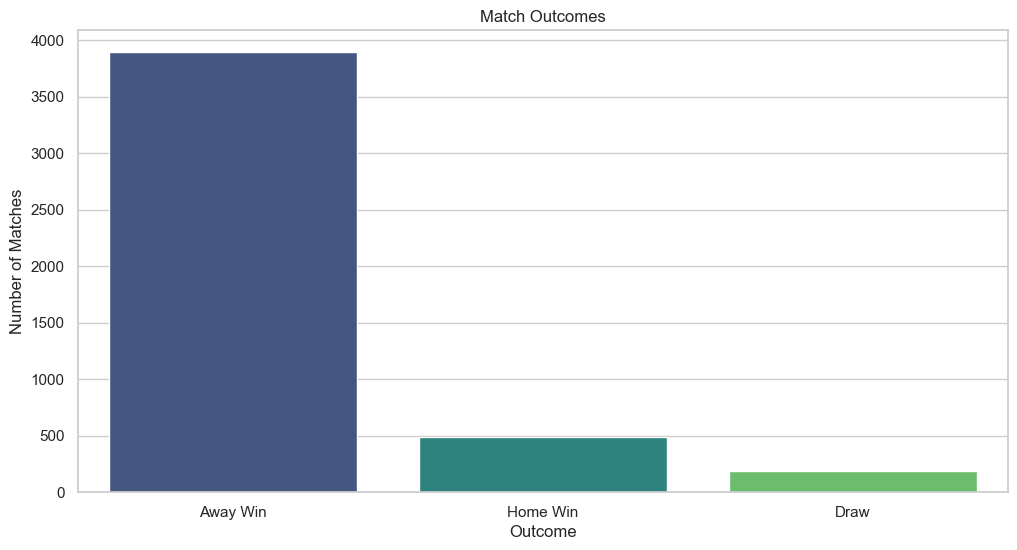

In [24]:
# Match outcomes
matches_df['Match Outcome'] = matches_df.apply(
    lambda row: 'Draw' if row['Home Team Goals'] == row['Away Team Goals'] else (
        'Home Win' if row['Home Team Goals'] > row['Away Team Goals'] else 'Away Win'), axis=1)
outcomes = matches_df['Match Outcome'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=outcomes.index, y=outcomes.values, palette='viridis')
plt.title('Match Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Matches')
plt.show()


Correlation Matrix

In [28]:
import pandas as pd

# Load the datasets
cups_df = pd.read_csv('WorldCups.csv')

# Identify non-numeric columns
non_numeric_columns = cups_df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Remove non-numeric columns
cups_df_cleaned = cups_df.drop(columns=non_numeric_columns)

# Handle missing values by filling with the mean of each column
cups_df_cleaned = cups_df_cleaned.fillna(cups_df_cleaned.mean())

# Verify the cleaned data
print(cups_df_cleaned.head())
print(cups_df_cleaned.info())


Non-numeric columns: Index(['Country', 'Winner', 'Runners-Up', 'Third', 'Fourth', 'Attendance'], dtype='object')
   Year  GoalsScored  QualifiedTeams  MatchesPlayed
0  1930           70              13             18
1  1934           70              16             17
2  1938           84              15             18
3  1950           88              13             22
4  1954          140              16             26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year            20 non-null     int64
 1   GoalsScored     20 non-null     int64
 2   QualifiedTeams  20 non-null     int64
 3   MatchesPlayed   20 non-null     int64
dtypes: int64(4)
memory usage: 772.0 bytes
None


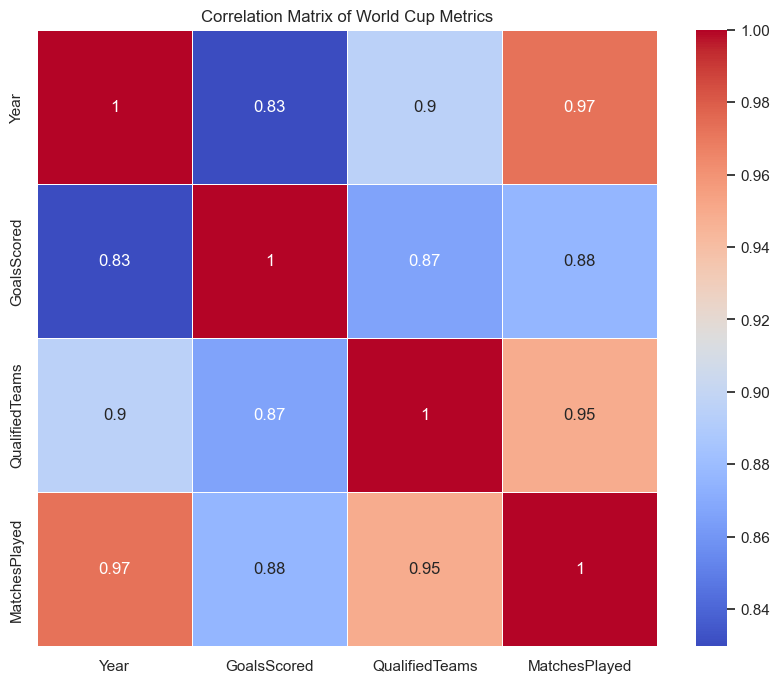

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = cups_df_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of World Cup Metrics')
plt.show()


Linear Regression - Goals vs Wins

In [30]:
import statsmodels.api as sm

# Prepare data for regression
cups_df['Wins'] = cups_df['Winner'].apply(lambda x: 1 if x else 0)
X = cups_df[['GoalsScored']]
y = cups_df['Wins']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -18.00
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               1.00
Time:                        23:33:55   Log-Likelihood:                 685.26
No. Observations:                  20   AIC:                            -1367.
Df Residuals:                      18   BIC:                            -1365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0000   2.88e-16   3.47e+15      

C:\Users\shaiv\.matplotlib\shiv\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Logistic Regression - Predicting Win Probability

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Prepare data for logistic regression
X = cups_df[['GoalsScored', 'MatchesPlayed', 'QualifiedTeams']]
y = cups_df['Winner']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Brazil       0.50      0.50      0.50         2
      France       0.00      0.00      0.00         1
  Germany FR       0.00      0.00      0.00         0
       Italy       0.50      0.50      0.50         2
       Spain       0.00      0.00      0.00         0
     Uruguay       0.00      0.00      0.00         1

    accuracy                           0.33         6
   macro avg       0.17      0.17      0.17         6
weighted avg       0.33      0.33      0.33         6



C:\Users\shaiv\.matplotlib\shiv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shaiv\.matplotlib\shiv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaiv\.matplotlib\shiv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and bei

K-Means Clustering

C:\Users\shaiv\.matplotlib\shiv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shaiv\.matplotlib\shiv\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


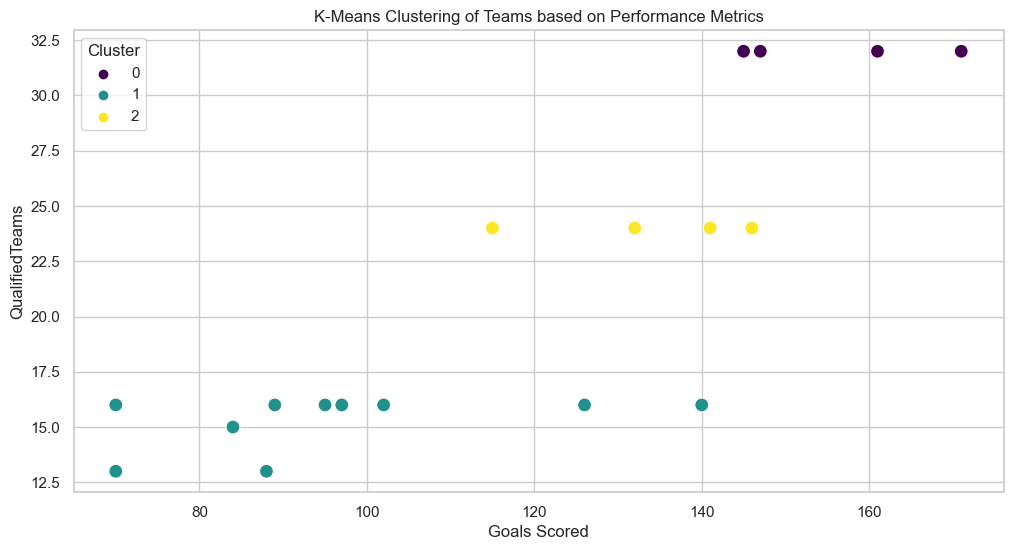

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
features = ['GoalsScored', 'MatchesPlayed', 'QualifiedTeams']
X = cups_df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cups_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cups_df, x='GoalsScored', y='QualifiedTeams', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of Teams based on Performance Metrics')
plt.xlabel('Goals Scored')
plt.ylabel('QualifiedTeams')
plt.show()


PCA

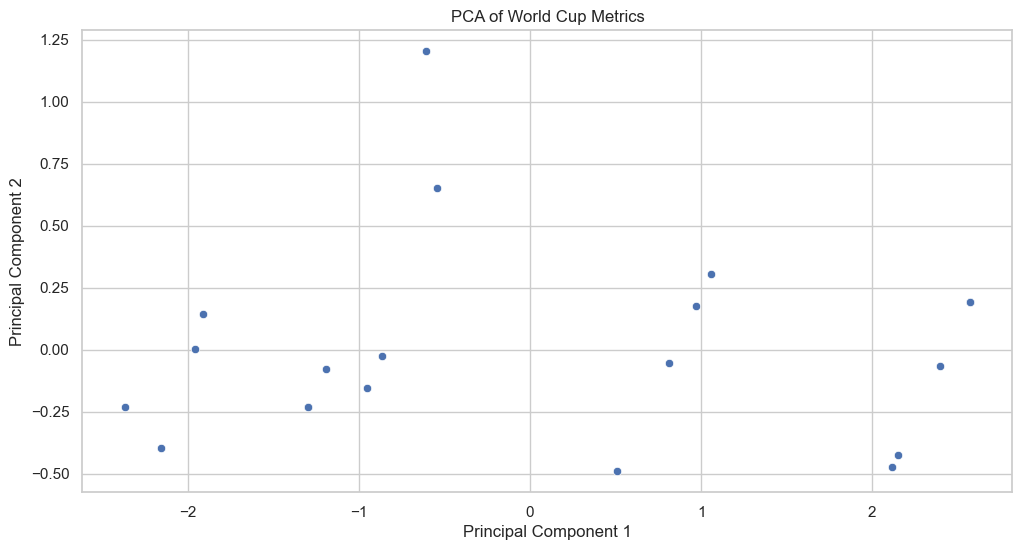

In [52]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])

# Plot the PCA results
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2')
plt.title('PCA of World Cup Metrics')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

